                                                             IMPORTING THE NECESSARY LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print("hello")

hello


                                                                  READING THE DATASET

In [9]:
df_dk=pd.read_csv('Keylogger_Detection.csv')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18604\1552980259.py:1: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dk=pd.read_csv('Keylogger_Detection.csv')


In [10]:
df_dk.head(5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


                                                                      DATA PREPROCESSING 

                                                                    1) CLASSIFYING DATA

In [13]:
df_dk.dtypes

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port       float64
 Destination IP     object
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Class               object
Length: 86, dtype: object

In [14]:
Class_df = df_dk["Class"]
df_num = df_dk.select_dtypes(include=[np.number])
df_num = df_num.join(Class_df)

                                                                 2) CLEANING DATA

In [18]:
df_num.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
print(df_num.isna().sum().sum())
df_num=df_num.dropna()

879


                                                                3) DATA LABELLING

In [21]:
df_num["label"]=df_num["Class"]
df_num.loc[df_num.label == "Benign", 'label'] = 0
df_num.loc[df_num.label == "Keylogger", 'label'] = 1
df_num.drop('Class', axis=1, inplace=True)
df_num.sample(5)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
25375,60833.0,443.0,6.0,80513900.0,15.0,15.0,739.0,5876.0,251.0,0.0,...,32.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0
375010,60605.0,80.0,6.0,8083539.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0
191041,58547.0,80.0,6.0,608643.0,4.0,3.0,401.0,845.0,401.0,0.0,...,32.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
77318,40137.0,5222.0,6.0,106201966.0,50.0,42.0,2693.0,1833.0,344.0,0.0,...,32.0,3.794065e+06,3.980974e+06,8094730.0,237900.0,3.151756e+07,1.418702e+07,44229435.0,16213007.0,0
303385,45745.0,443.0,6.0,42607383.0,20.0,26.0,4735.0,28164.0,840.0,0.0,...,20.0,3.312110e+05,0.000000e+00,331211.0,331211.0,4.198483e+07,0.000000e+00,41984826.0,41984826.0,0


                                                                4) SAMPLING DATA

In [23]:
df_num=df_num.sample(n=200000)

In [24]:
df_num.groupby('label').size()

label
0    118032
1     81968
dtype: int64

In [25]:
for col in (df_num.iloc[:,:-1].columns):
    if(df_num[col].min()==df_num[col].max()):
            df_num.drop(col, axis=1, inplace=True)

                                                                    5) FEATURE SCALING

In [27]:
def standardize(df,col):
    df[col]= 255*(df[col]-df[col].min())/(df[col].max()-df[col].min())

for i in (df_num.iloc[:,:-1].columns):
    standardize (df_num,i)

In [28]:
df_num.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
200036,215.616874,1.735627,90.0,1.325947,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,...,203.094922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32088,1.723814,215.417525,90.0,0.094807,0.000000,0.068123,0.000000,0.000494,0.000000,0.000000,...,203.094926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
344198,197.005127,0.207648,255.0,0.002682,0.000000,0.017031,0.000633,0.000553,5.414384,5.414384,...,203.094926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
425007,140.115363,0.313431,90.0,0.255942,0.235294,0.289521,0.007594,0.250303,64.972603,0.000000,...,203.094926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
353004,153.730773,1.735627,90.0,0.050955,0.000000,0.034061,0.000000,0.000365,0.000000,0.000000,...,203.094926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
df_num.tail()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
503051,228.477385,1.735627,90.0,243.922697,0.382353,0.153276,0.017598,0.048219,60.082192,0.0,...,203.094926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1129,155.131615,0.313431,90.0,0.237822,0.058824,0.034061,0.006819,0.002048,58.335616,0.0,...,203.094922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
224586,196.514832,0.313431,90.0,0.243003,0.205882,0.255460,0.008329,0.216658,71.260274,0.0,...,203.094926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
160772,140.457792,0.313431,90.0,4.245188,0.088235,0.068123,0.013208,0.003779,113.003425,0.0,...,203.094922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
381880,167.778108,0.313431,90.0,87.676776,0.205882,0.102184,0.011841,0.003685,56.589041,0.0,...,203.094926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [30]:
for i in range(957):
    col="A"+str(i)
    df_num[col]=0

df_num.shape

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18604\2671200372.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[col]=0
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18604\2671200372.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[col]=0
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18604\2671200372.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

(200000, 1025)

In [31]:
target=['label']
features = [c for c in df_num.columns if c!="label"]

<class 'numpy.ndarray'>


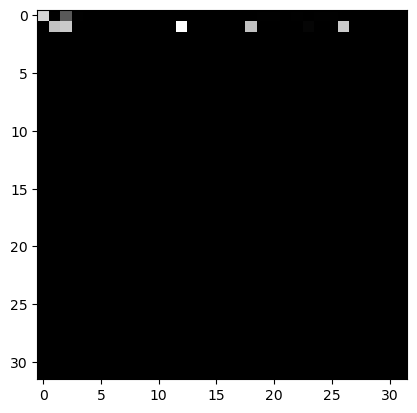

In [32]:
row_1=df_num[features].iloc[0].to_numpy()
row_1.shape
row_2=row_1.reshape(32, 32)
row_2=row_2.astype(int)
print(type(row_2))
from matplotlib import pyplot as plt
import plotly.express as px
plt.imshow(row_2,cmap='grey')
plt.show()

                                                          SPLITTING THE DATASET ( 80/20 )

In [34]:
X = df_num[features].values # Features
y = df_num[target].values # Target

X=X.astype(np.float32)
y=y.astype(np.float32)

X.shape,y.shape,

((200000, 1024), (200000, 1))

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [61]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160000, 1024), (40000, 1024), (160000, 1), (40000, 1))

In [63]:
X_train_cnn = np.reshape(X_train, (X_train.shape[0], 32,32,1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], 32,32,1))
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(160000, 32, 32, 1)
(40000, 32, 32, 1)


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam

In [78]:
import keras
# Conv1D + LSTM
from keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

from tensorflow.keras import models, layers

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications import InceptionV3

from tensorflow.keras.applications import ResNet50

In [82]:
learning_rate=0.0001
batch_size=1024
epochs = 50

model_save = ModelCheckpoint('./Keylogging.weights.h5', 
                             save_best_only = True, 
                             save_weights_only = True,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.75, 
                              patience = 10, min_delta = 0.0001, 
                              mode = 'min', verbose = 1)

In [84]:
def create_model(): 
    inputs = layers.Input(shape=(32,32,1))
    efficientnet_layers = EfficientNetB0(include_top=False,input_shape=(),weights='imagenet',pooling='avg')
    model = Sequential()
    
    model.add(inputs)
    model.add(keras.layers.Conv2D(3,3,activation='relu',padding='same'))
    model.add(efficientnet_layers)
    #model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[keras.metrics.AUC(name='auc')])

    return model

model = create_model()
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,882 (15.45 MB)

 Trainable params: 4,008,859 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [86]:
history = model.fit(X_train_cnn,
                    y_train,
                    batch_size=batch_size,
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(X_test_cnn,y_test),
                    callbacks = [model_save, early_stop, reduce_lr],)

Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.5732 - loss: 0.6953
Epoch 1: val_loss improved from inf to 0.71160, saving model to ./Keylogging.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - auc: 0.5733 - loss: 0.6951 - val_auc: 0.4923 - val_loss: 0.7116 - learning_rate: 1.0000e-04
Epoch 2/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:30 974ms/step - auc: 0.6801 - loss: 0.6376

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.71160
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 168ms/step - auc: 0.6801 - loss: 0.6376 - val_auc: 0.4887 - val_loss: 0.7122 - learning_rate: 1.0000e-04
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6182 - loss: 0.6543
Epoch 3: val_loss improved from 0.71160 to 0.69872, saving model to ./Keylogging.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - auc: 0.6183 - loss: 0.6542 - val_auc: 0.5107 - val_loss: 0.6987 - learning_rate: 1.0000e-04
Epoch 4/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:45 682ms/step - auc: 0.5741 - loss: 0.6713
Epoch 4: val_loss did not improve from 0.69872
156/156 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - auc: 0.5741 - loss: 0.6713 - val_auc: 0.5028 - val_loss: 0.7033 - learning_rate: 1.0000e-04
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6336 - loss: 0.6445
Epoch 5: val_loss did not improve from 0.69872
156/156 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - auc: 0.6336 - loss: 0.6444 - val_auc: 0.5140 - val_loss: 0.7094 -

                                                            EVALUATION

In [91]:
y_pred = model.predict(X_test_cnn, batch_size=512)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 328ms/step
AUC: 0.527


In [93]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('history.csv')

                                                          1) TRAINING CURVES

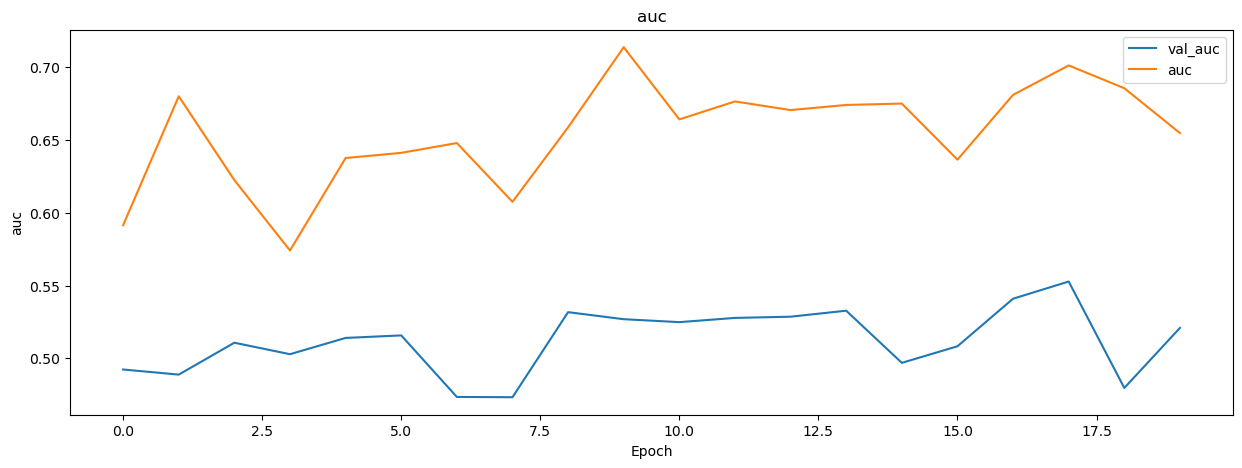

In [96]:
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_auc'],label='val_auc')
plt.plot(range(history.epoch[-1]+1),history.history['auc'],label='auc')
plt.title('auc'); plt.xlabel('Epoch'); plt.ylabel('auc');plt.legend(); 
plt.show()

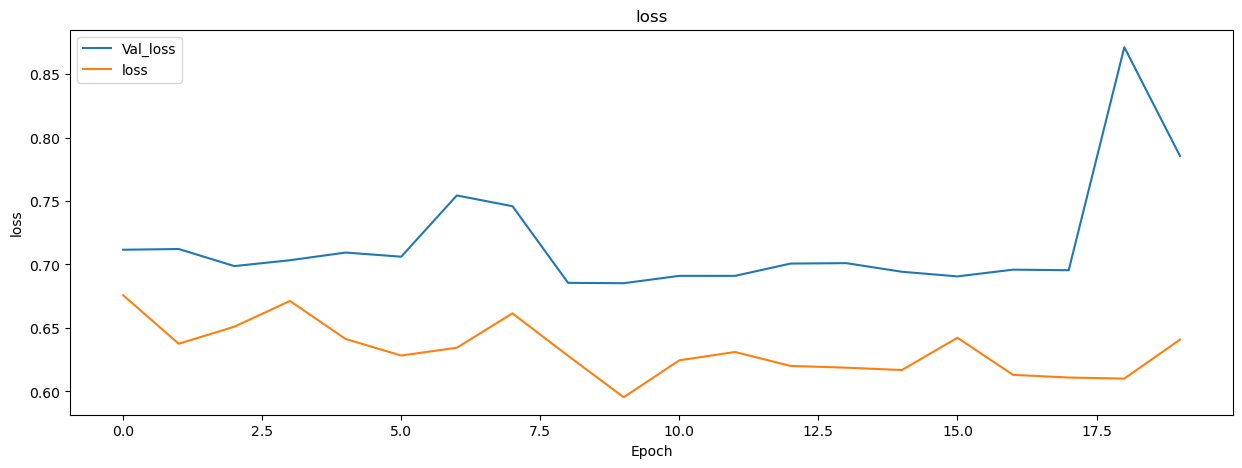

In [98]:
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_loss'],label='Val_loss')
plt.plot(range(history.epoch[-1]+1),history.history['loss'],label='loss')
plt.title('loss'); plt.xlabel('Epoch'); plt.ylabel('loss');plt.legend(); 
plt.show()

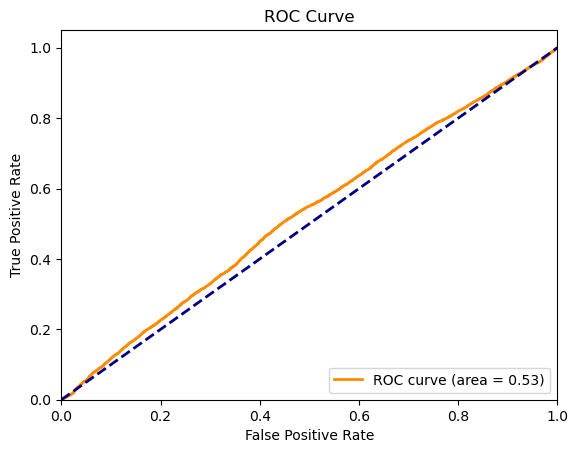

In [100]:
def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
generate_results(y_test, y_pred)